In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("./build-clang/language_bindings/python/")
#sys.path.append("./build-clang5/language_bindings/python/")
from numpy.linalg import norm
import muSpectre as µ

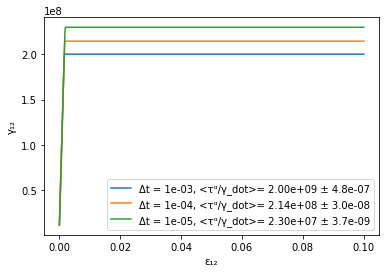

In [2]:
def curve(delta_t, tau_y0 = 200e6,     m_par = .02, gamma_dot0=.1,     h0 = 0e9 ,   a_par = 0,         max_shear = 10e-2):
    bulk_m = 175e9;
    shear_m = 120e9;

    delta_tau_y = 100e6;
    q_n = 1.4;
    #delta_t = 1e-4;
    tolerance=1e-12
    dirs = np.array([[1., 0.]])
    norms = np.array([[0., 1.]])
    resolution = [1,1]
    lengths = [1, 1]
    formulation = µ.Formulation.finite_strain

    cell = µ.Cell(resolution,
                  lengths,
                  formulation)
    dim = len(lengths)

    mat = µ.material.MaterialCrystalPlasticityFinite_2d_1slip.make(
        cell, "crystal", bulk_m, shear_m, gamma_dot0, m_par, tau_y0, h0, delta_tau_y, a_par, q_n, dirs, norms, delta_t, tolerance=tolerance)

    for pixel in cell:
        mat.add_pixel(pixel, np.array([[0.]]))

        cell.initialise()

        tau = list()
        sigma_xx=list()
        gammas=list()
        tau_inc = list()
        gamma_dot = list()
        shear_incr = 1.e-4
        np_load = int(max_shear/shear_incr)
        F = np.eye(2)

        for step in range(np_load):
            F[0,1] += shear_incr
            gammas.append(F[0,1])

            stress = cell.evaluate_stress(F.T.reshape(-1))
            mat.save_history_variables()
            tau.append(stress[2])
            sigma_xx.append(stress[0])
            tau_inc.append(mat.get_real_field("dummy τ_inc"))
            gamma_dot.append(mat.get_real_field("dummy γ_dot"))
            #print("gamma = np.array([{}])".format(", ".join(
                #    ("{}".format(g) for g in gammas))))
            #print("tau = np.array([{}])".format(", ".join(
                #    ("{}".format(t) for t in tau))))

    tau_inc = np.array(tau_inc).reshape(-1)
    gamma_dot = np.array(gamma_dot).reshape(-1)
    gammas = np.array(gammas).reshape(-1)
    tau = np.array(tau)

    return gammas, tau, gamma_dot, tau_inc
tau_y0 = 200e6;
for dt in (1e-3, 1e-4, 1e-5):
    gammas, tau, gamma_dot, tau_inc = curve(dt, tau_y0, m_par = .03)
    tg_bar = (tau_inc/gamma_dot).mean()
    tg_std = (tau_inc/gamma_dot).std()

    plt.plot(gammas, tau, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    pass
plt.legend(loc='best')
plt.xlabel('ε₁₂')
plt.ylabel('γ₁₂');




299988716.8722687
299988716.8722687
299988716.8722687


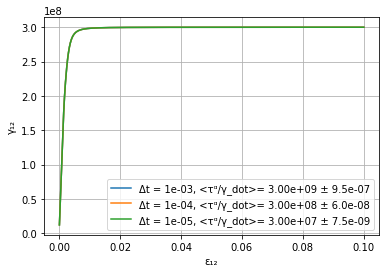

In [3]:
tau_y0 = 200e6;
for dt in (1e-3, 1e-4, 1e-5):
    gammas, tau, gamma_dot, tau_inc = curve(dt, tau_y0, m_par = .1, gamma_dot0 =1e-4/dt, h0=1000e9, a_par = 1.5, max_shear=10e-2)
    tg_bar = (tau_inc/gamma_dot).mean()
    tg_std = (tau_inc/gamma_dot).std()

    plt.plot(gammas, tau, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    pass
    print(tau.max())
plt.legend(loc='best')
plt.xlabel('ε₁₂')
plt.grid(True)
plt.ylabel('γ₁₂');


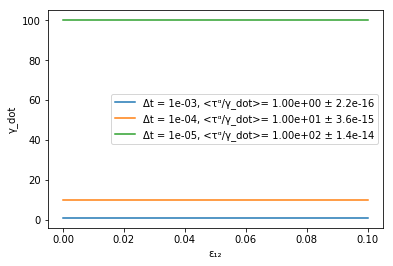

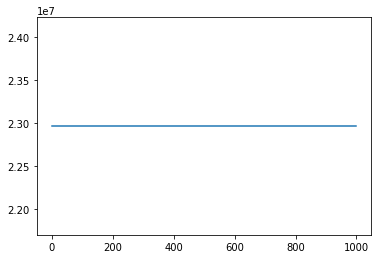

In [4]:
tau_y0 = 200e6;
for dt in (1e-3, 1e-4, 1e-5):
    gammas, tau, gamma_dot, tau_inc = curve(dt, tau_y0, m_par = .03)
    tg_bar = (gamma_dot/.1).mean()
    tg_std = (gamma_dot/.1).std()

    ##plt.plot(gammas, tau, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    plt.plot(gammas, gamma_dot/.1, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    pass
plt.legend(loc='best')
plt.xlabel('ε₁₂')
plt.ylabel('γ_dot');
plt.figure()
plt.plot(tau_inc/gamma_dot)

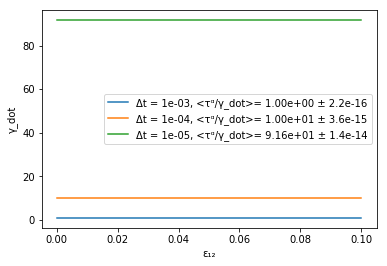

In [5]:
tau_y0 = 200e6;
gamma_dot_default=.1
for dt in (1e-3, 1e-4, 1e-5):
    gammas, tau, gamma_dot, tau_inc = curve(dt, tau_y0, m_par = .5 , gamma_dot0=1e-2)
    tg_bar = (gamma_dot/.1).mean()
    tg_std = (gamma_dot/.1).std()

    ##plt.plot(gammas, tau, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    plt.plot(gammas, gamma_dot/.1, label="Δt = {:.0e}, <τᵅ/γ_dot>= {:.2e} ± {:.1e}".format(dt, tg_bar, tg_std))
    pass
plt.legend(loc='best')
plt.xlabel('ε₁₂')
plt.ylabel('γ_dot');


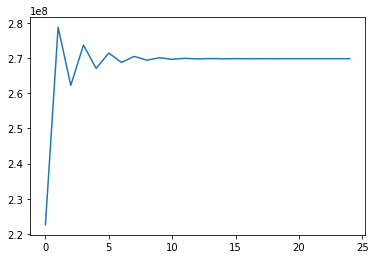

In [6]:
tau = np.array((.99681e+08,
    3.06304e+08,
    3.13596e+08,
    3.1911e+08 ,
    3.25063e+08,
    3.29757e+08,
    3.34694e+08,
    3.38743e+08,
    3.42899e+08,
    3.46425e+08))
tau = np.array([2.22542e+08, 2.78801e+08, 2.62275e+08, 2.73714e+08, 2.67101e+08, 2.7146e+08, 2.68786e+08, 2.70508e+08, 2.69431e+08, 2.70117e+08, 2.69684e+08, 2.69958e+08, 2.69784e+08, 2.69894e+08, 2.69824e+08, 2.69868e+08, 2.69839e+08, 2.69857e+08, 2.69845e+08, 2.69852e+08, 2.69847e+08, 2.6985e+08, 2.69847e+08, 2.69848e+08, 2.69847e+08])



plt.plot(tau)


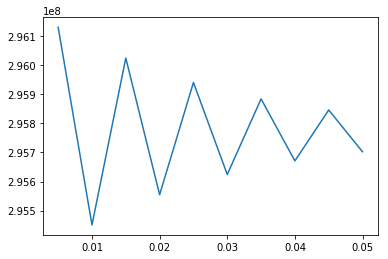

In [7]:
gamma = np.array([0.005, 0.010000000000000002, 0.015000000000000003, 0.020000000000000004, 0.025000000000000005, 0.030000000000000006, 0.035, 0.04, 0.045000000000000005, 0.05])
tau = np.array([296130891.4393467, 295450799.7219975, 296024844.9454069, 295554586.12864435, 295940972.1918171, 295624237.6484094, 295884371.1672535, 295671061.16190904, 295846202.27996933, 295702553.6179742])
plt.plot(gamma, tau)

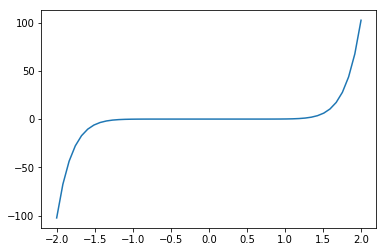

In [8]:
def fun18(t, m=.1, s=1., gamma_dot0=.1):
    return gamma_dot0 * (abs(t)/s)**(1/m)*np.sign(t)

tau = np.linspace(-2, 2)
plt.plot(tau, fun18(tau))

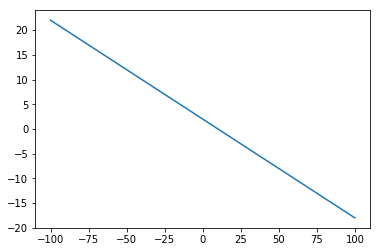

In [9]:
def fun19(gamma_dot, tau_star=2, delta_t = .1, young_schmid = 2):
    return tau_star - delta_t*gamma_dot*young_schmid
gamma_dot = np.linspace(-100, 100)
plt.plot(gamma_dot, fun19(gamma_dot))

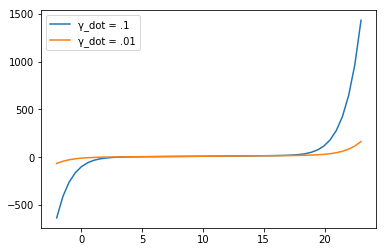

In [10]:
def residual(gamma_dot, gamma_dot0=.1, tau_star=2, delta_t=.1, young_schmid=2, s=1, m=.1):
    tau = fun19(gamma_dot, tau_star, delta_t, young_schmid)
    return gamma_dot - fun18(tau, m, s, gamma_dot0)

def residual_jac(gamma_dot, gamma_dot0=.1, tau_star=2, delta_t=.1, young_schmid=2, s=1, m=.1):
    tau = fun19(gamma_dot, tau_star, delta_t, young_schmid)
    return 1.-.5*delta_t*gamma_dot0/m*abs(tau)**((1-m)/m)*s**(-1/m)*young_schmid*np.sign(tau)
gamma_dot = np.linspace(-2, 23)
plt.plot(gamma_dot, residual(gamma_dot), label="γ_dot = .1")
plt.plot(gamma_dot, residual(gamma_dot, gamma_dot0=.01), label="γ_dot = .01")
plt.legend()

In [11]:
def load_to_a_point(delta_t=1e-3,
                    tau_y0 = 200e6,
                    m_par = .1,
                    gamma_dot0=.1,
                    h0 = 0e9 ,
                    a_par = 0,
                    max_shear = 10e-2):
    bulk_m = 175e9;
    shear_m = 120e9;

    delta_tau_y = 100e6;
    q_n = 1.4;
    #delta_t = 1e-4;
    tolerance=1e-12
    dirs = np.array([[1., 0.]])
    norms = np.array([[0., 1.]])
    resolution = [1,1]
    lengths = [1, 1]
    formulation = µ.Formulation.finite_strain

    cell = µ.Cell(resolution,
                  lengths,
                  formulation)
    dim = len(lengths)

    mat = µ.material.MaterialCrystalPlasticityFinite_2d_1slip.make(
        cell, "crystal", bulk_m, shear_m, gamma_dot0, m_par, tau_y0, h0, delta_tau_y, a_par, q_n, dirs, norms, delta_t, tolerance=tolerance)

    for pixel in cell:
        mat.add_pixel(pixel, np.array([[0.]]))

        cell.initialise()

        tau = list()
        sigma_xx=list()
        gammas=list()
        tau_inc = list()
        gamma_dot = list()
        shear_incr = 1.e-4
        np_load = int(max_shear/shear_incr)
        F = np.eye(2)

        for step in range(np_load):
            F[0,1] += shear_incr
            gammas.append(F[0,1])

            stress = cell.evaluate_stress(F.T.reshape(-1))
            print(stress)
            mat.save_history_variables()
            tau.append(stress[2])
            sigma_xx.append(stress[0])
            tau_inc.append(mat.get_real_field("dummy τ_inc"))
            gamma_dot.append(mat.get_real_field("dummy γ_dot"))
            #print("gamma = np.array([{}])".format(", ".join(
                #    ("{}".format(g) for g in gammas))))
            #print("tau = np.array([{}])".format(", ".join(
                #    ("{}".format(t) for t in tau))))

    tau_inc = np.array(tau_inc).reshape(-1)
    gamma_dot = np.array(gamma_dot).reshape(-1)
    gammas = np.array(gammas).reshape(-1)
    tau = np.array(tau)
    print(stress)

    def fun(F_vec):
        stress = cell.evaluate_stress(F_vec)
        return stress

    return fun, F.T.reshape(-1)


In [12]:
def elastic_load_to_a_point(delta_t=1e-3,
                            m_par = .1,
                            gamma_dot0=.1,
                            h0 = 0e9 ,
                            a_par = 0,
                            max_shear = 10e-2):
    bulk_m = 175e9;
    shear_m = 120e9;
    tau_y0 = 1e200

    delta_tau_y = 100e6;
    q_n = 1.4;
    #delta_t = 1e-4;
    tolerance=1e-12
    dirs = np.array([[1., 0.]])
    norms = np.array([[0., 1.]])
    resolution = [1,1]
    lengths = [1, 1]
    formulation = µ.Formulation.finite_strain

    cell = µ.Cell(resolution,
                  lengths,
                  formulation)
    dim = len(lengths)

    mat = µ.material.MaterialCrystalPlasticityFinite_2d_1slip.make(
        cell, "crystal", bulk_m, shear_m, gamma_dot0, m_par, tau_y0, h0, delta_tau_y, a_par, q_n, dirs, norms, delta_t, tolerance=tolerance)

    for pixel in cell:
        mat.add_pixel(pixel, np.array([[0.]]))

        cell.initialise()

        tau = list()
        sigma_xx=list()
        gammas=list()
        tau_inc = list()
        gamma_dot = list()
        shear_incr = 1.e-4
        np_load = int(max_shear/shear_incr)
        F = np.eye(2)

        F[0,1] += max_shear
        gammas.append(F[0,1])

        stress = cell.evaluate_stress(F.T.reshape(-1))

    def fun(F_vec):
        stress = cell.evaluate_stress(F_vec)
        return stress

    return fun, F.T.reshape(-1)


In [13]:
fun, F = elastic_load_to_a_point(max_shear=1e-2)

In [14]:
def numerical_gradient(fun, x, delta):
    dim = len(x)
    grad = np.zeros([dim, dim])
    for i in range(dim):
        del_x = np.zeros_like(x)
        del_x[i] += delta
        del_f = fun(x + del_x).copy()
        del_f -= fun(x)
        del_f /= delta
        #print("{}:\ndel_x: {}\ndelf: {}\nf+: {}\nf-: {}".format(i, del_x, del_f, fun(x + del_x), fun(x)))
        grad[:,i] = del_f
        pass
    return grad

In [17]:
#%%debug
ref = np.array([[3.35e+11,        0,  9.5e+08,  9.5e+10],
                [ 1.2e+09,  1.2e+11,  1.2e+11,        0],
                [ 1.2e+09,  1.2e+11,  1.2e+11,        0],
                [ 9.5e+10,        0, 3.35e+09, 3.35e+11]])
num_grad = numerical_gradient(fun, F, delta=1e-6)
print(num_grad)
print(norm(num_grad-ref)/norm(ref))
print(num_grad - ref)

[[3.35017252e+11 1.20016751e+09 3.35016750e+09 9.50000475e+10]
 [1.20000000e+09 1.20004750e+11 1.20000000e+11 1.20000000e+09]
 [3.35000167e+09 1.20000000e+11 1.20050255e+11 3.35000167e+09]
 [9.50000475e+10 1.20016750e+09 3.35016749e+09 3.35017252e+11]]
0.00929513020124777
[[1.72524875e+07 1.20016751e+09 2.40016750e+09 4.74964064e+04]
 [0.00000000e+00 4.75000024e+06 0.00000000e+00 1.20000000e+09]
 [2.15000167e+09 4.74929810e+02 5.02550251e+07 3.35000167e+09]
 [4.74964082e+04 1.20016750e+09 1.67494530e+05 1.72524875e+07]]


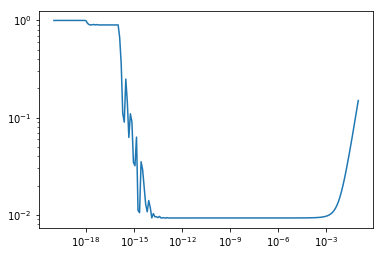

In [18]:
errors = np.zeros(200)
deltas = np.logspace(-1, -20, len(errors))
for i, delta in enumerate(deltas):
    num_grad = numerical_gradient(fun, F, delta)
    errors[i] = norm(num_grad-ref)/norm(ref)
plt.loglog(deltas, errors)

In [19]:
def elastic_law(delta_t=1e-3,
                m_par = .1,
                gamma_dot0=.1,
                h0 = 0e9 ,
                a_par = 0,
                max_shear = 10e-2):
    bulk_m = 175e9;
    shear_m = 120e9;
    tau_y0 = 1e200

    delta_tau_y = 100e6;
    q_n = 1.4;
    #delta_t = 1e-4;
    tolerance=1e-12
    dirs = np.array([[1., 0.]])
    norms = np.array([[0., 1.]])
    resolution = [1,1]
    lengths = [1, 1]
    formulation = µ.Formulation.finite_strain

    cell = µ.Cell(resolution,
                  lengths,
                  formulation)
    dim = len(lengths)

    mat = µ.material.MaterialCrystalPlasticityFinite_2d_1slip.make(
        cell, "crystal", bulk_m, shear_m, gamma_dot0, m_par, tau_y0, h0, delta_tau_y, a_par, q_n, dirs, norms, delta_t, tolerance=tolerance)

    for pixel in cell:
        mat.add_pixel(pixel, np.array([[0.]]))

        cell.initialise()

        tau = list()
        sigma_xx=list()
        gammas=list()
        tau_inc = list()
        gamma_dot = list()
        shear_incr = 1.e-4
        np_load = int(max_shear/shear_incr)
        F = np.eye(2)

        F[0,1] += max_shear
        gammas.append(F[0,1])

        stress = cell.evaluate_stress(F.T.reshape(-1))

    def fun(F_vec):
        stress = cell.evaluate_stress(F_vec)
        return stress

    return fun, F.T.reshape(-1)
